# Piano Asymptotics

As an exercise in class, let's explore the piano wire approximation.

Recall treating the wire as an elastic beam, we get a 4th order ODE describing the motion. This changes the pattern of the harmonics.

Questions to explore:
- can we hear the difference?
- can we hear beats in harmonics, between fundamentals and 1st harmonics?
- can we plot anything interesting?

Steps to do
- how do we produce sounds in Jupyter?
- how can we vary a small parameter in a systematics way
- how do we sum series?
- how do we play with weights in the summation series
- can we see this in the Fourier transform?
- Wavelets? Gabor? Other time-freq transforms?

Warnings
- what about clipping of the waveform (what is this)
- what about the quality of sound from our little laptop
- do we trust our ears, or our Fourier transform>


### We start with code from UsingSyzygy, called P_Audio

In [1]:
%matplotlib inline
from pylab import *
from IPython.display import Audio

In [2]:
Fs = 8000.0
Len = 5
t = linspace(0,Len,Fs*Len)
f1 = 442.0
f2 = 440.0
signal = sin(2*pi*f1*t) + sin(2*pi*f2*t)

Audio(data=signal, rate=Fs)

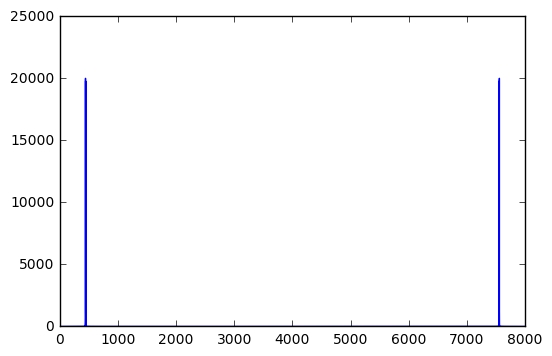

In [3]:
freqs = t*Fs/Len   # a list of frequencies, in Hertz
fsig = abs(fft(signal))  # Fourier transform of the signal
plot(freqs,fsig)  # amplitude versus frequency

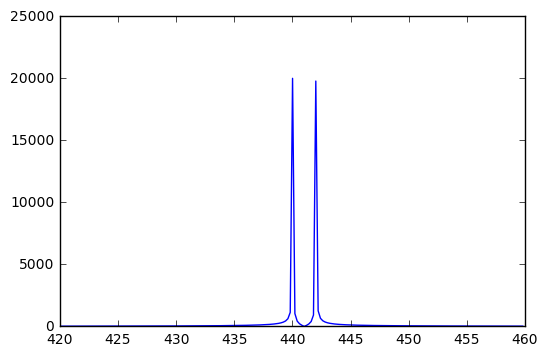

In [4]:
plot(freqs[2100:2300],fsig[2100:2300])

In [7]:
# Let's check whether the audio tool clips sounds at amplitude one or not. 
signal = 100*sin(2*pi*f1*t)   
Audio(data=signal, rate=Fs)

It appears that there is no clipping, checked for amplitudes up to 100.

In [8]:
# Here is a signal with a few harmonics
signal = sin(2*pi*f1*t)   + sin(2*pi*2*f1*t)+ sin(2*pi*3*f1*t)
Audio(data=signal, rate=Fs)

In [35]:
# Lets get serious, with higher sampling rate, and various decays on the harmonics
Fs = 44100.0
Len = 5
t = linspace(0,Len,Fs*Len)
f1 = 440.0
k = 1 # order of decay of the harmonics (0,1,2 give interesting sounds)

signal = (sin(2*pi*f1*t)   + 
          sin(2*pi*2*f1*t)*(1/2)**k + 
          sin(2*pi*3*f1*t)*(1/3)**k + 
          sin(2*pi*4*f1*t)*(1/4)**k + 
          sin(2*pi*5*f1*t)*(1/5)**k +
          sin(2*pi*6*f1*t)*(1/6)**k +
          sin(2*pi*7*f1*t)*(1/7)**k +
          sin(2*pi*8*f1*t)*(1/8)**k +
          sin(2*pi*9*f1*t)*(1/9)**k )
Audio(data=signal, rate=Fs)

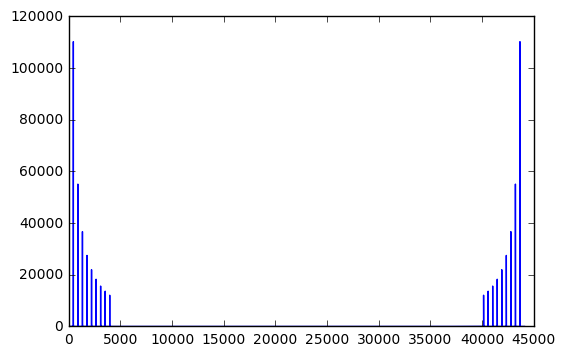

In [36]:
freqs = t*Fs/Len   # a list of frequencies, in Hertz
fsig = abs(fft(signal))  # Fourier transform of the signal
plot(freqs,fsig)  # amplitude versus frequency

In [37]:
# Let's try odd harmonics
f1 = 440.0
k = 1 # order of decay of the harmonics (0,1,2 give interesting sounds)

signal = (sin(2*pi*f1*t)   + 
          sin(2*pi*3*f1*t)*(1/3)**k + 
          sin(2*pi*5*f1*t)*(1/5)**k +
          sin(2*pi*7*f1*t)*(1/7)**k +
          sin(2*pi*9*f1*t)*(1/9)**k )
Audio(data=signal, rate=Fs)

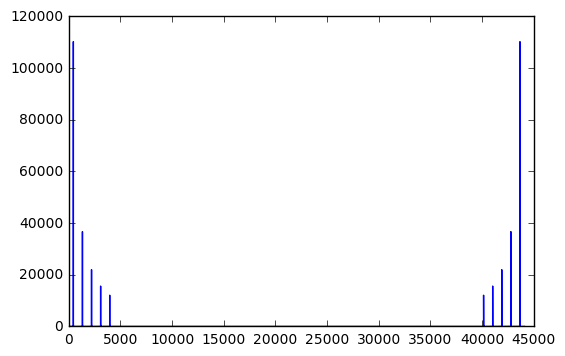

In [38]:
freqs = t*Fs/Len   # a list of frequencies, in Hertz
fsig = abs(fft(signal))  # Fourier transform of the signal
plot(freqs,fsig)  # amplitude versus frequency

In [83]:
# Now let's do the piano wire with the 4th order correction to the PDE
# n-th harmonic given by f_k = f_1*k*(1 + (n^2-1)*eps)
eps = .0015  # the value .0015 corresponds to a typical piano wire
f1 = 440
f2 = f1*2*(1 + (2**2-1)*eps)
f3 = f1*3*(1 + (3**2-1)*eps)
f4 = f1*4*(1 + (4**2-1)*eps)
f5 = f1*5*(1 + (5**2-1)*eps)
f6 = f1*6*(1 + (6**2-1)*eps)
f7 = f1*7*(1 + (7**2-1)*eps)
f8 = f1*8*(1 + (8**2-1)*eps)
f9 = f1*9*(1 + (9**2-1)*eps)

k = 2 # order of decay of the harmonics (0,1,2 give interesting sounds)

signal_1 = (sin(2*pi*f1*t)   + 
          sin(2*pi*f2*t)*(1/2)**k + 
          sin(2*pi*f3*t)*(1/3)**k + 
          sin(2*pi*f4*t)*(1/4)**k + 
          sin(2*pi*f5*t)*(1/5)**k +
          sin(2*pi*f6*t)*(1/6)**k +
          sin(2*pi*f7*t)*(1/7)**k +
          sin(2*pi*f8*t)*(1/8)**k +
          sin(2*pi*f9*t)*(1/9)**k )

signal_2 = sin(2*pi*880*t)*(1/2)**k

signal = signal_1 # + signal_2  # Use just singal_1 to hear the piano. Add both to here the beats ()

Audio(data=signal, rate=Fs)

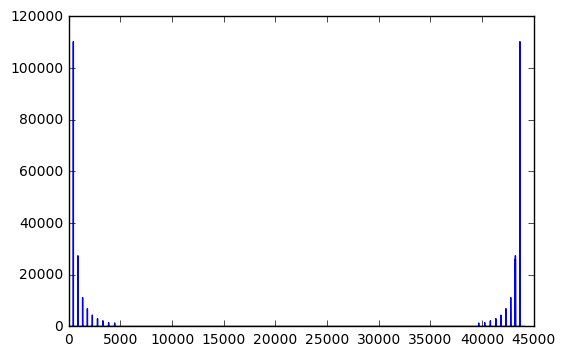

In [77]:
fsig = abs(fft(signal))  # Fourier transform of the signal
plot(freqs,fsig)  # amplitude versus frequency

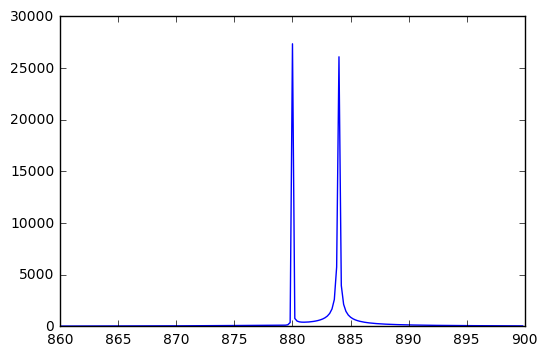

In [78]:
# If you set up the sum of two frequencies, you see peaks at 880 and 884
plot(freqs[4300:4500],fsig[4300:4500])

In [85]:
# Here is the actual value of f2, so you expect about 4 beats per second.
f2

883.9599999999999

In [101]:
# Let's try other values for epsilon. Maybe something more like a metal bar (bigger epsilon)
eps = .01  # the value .0015 corresponds to a typical piano wire
f1 = 440
f2 = f1*2*(1 + (2**2-1)*eps)
f3 = f1*3*(1 + (3**2-1)*eps)
f4 = f1*4*(1 + (4**2-1)*eps)
f5 = f1*5*(1 + (5**2-1)*eps)
f6 = f1*6*(1 + (6**2-1)*eps)
f7 = f1*7*(1 + (7**2-1)*eps)
f8 = f1*8*(1 + (8**2-1)*eps)
f9 = f1*9*(1 + (9**2-1)*eps)

k = 2 # order of decay of the harmonics (0,1,2 give interesting sounds)

signal = (sin(2*pi*f1*t)   + 
          sin(2*pi*f2*t)*(1/2)**k + 
          sin(2*pi*f3*t)*(1/3)**k + 
          sin(2*pi*f4*t)*(1/4)**k + 
          sin(2*pi*f5*t)*(1/5)**k +
          sin(2*pi*f6*t)*(1/6)**k +
          sin(2*pi*f7*t)*(1/7)**k +
          sin(2*pi*f8*t)*(1/8)**k +
          sin(2*pi*f9*t)*(1/9)**k )

signal = signal*exp(-2*t)  # exponential decay exp(-2t) seems good

Audio(data=signal, rate=Fs)